In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
import statsmodels.api as sm
from PyEMD.EMD import EMD

In [1]:
import random
import pandas as pd
import matplotlib.pylab as plt
from math import sqrt
import numpy as np 
from collections import defaultdict
from numpy import linalg as LA
from copy import deepcopy

def cluster_time_series(t, c): 
    """
    Perform K-Spectral Centroid (K-SC) clustering on time series data.

    Parameters:
        t (ndarray): Time series data of shape (n_samples, n_timestamps)
        c (int): Number of clusters (k)

    Returns:
        mem (ndarray): Cluster labels for each time series
        mu (ndarray): Cluster centroids
    """
    random.seed(0)
    matrix = t
    k = c
    N = matrix.shape[0]
    
    # Randomly initialize cluster membership for each time series
    mem = np.array([random.randint(0, k-1) for idx in range(N)])
    
    # Define alpha as in the original K-SC paper
    alpha = lambda x, y: np.dot(x, y) / np.dot(y, y)
    
    # Define d^ (d_hat) as the shape-based distance
    d_hat = lambda x, y: (np.linalg.norm(x - alpha(x, y) * y)) / (np.linalg.norm(x))
    
    for it in range(100):
        print("Iteration", it)  # Display the current iteration number
        prev_mem = deepcopy(mem)
        mu = np.zeros((k, matrix[0].shape[0]))  # Cluster centroids
        
        # Update centroids
        for j in range(k):
            A = []
            for vec_idx in range(N): 
                if mem[vec_idx] == j: 
                    vec = matrix[vec_idx]
                    A.append(vec)
            A = np.array(A)
            if A.shape[0] == 0: 
                mu[j] = np.zeros(matrix[0].shape[0])
                continue
            interm = np.sqrt(np.sum(np.square(A), axis=1))
            B = np.divide(A, np.tile(interm, (A.shape[1], 1)).T)
            M = np.matmul(B.T, B) - A.shape[0] * np.identity(A.shape[1])
            w, v = LA.eig(M)
            idx = np.argmin(np.abs(w))
            mu[j] = -v[:, idx] if np.sum(v[:, idx]) < 0 else v[:, idx]

        # Reassign time series to nearest centroid
        for vec_idx in range(N): 
            vec = matrix[vec_idx]
            distances = [d_hat(vec, mu[j]) for j in range(k)]
            j_star = np.argmin(distances)
            mem[vec_idx] = j_star
            
        # Stop if cluster assignments have not changed
        if np.linalg.norm(prev_mem - mem) == 0: 
            break

    # Optionally save results
    # np.save('mu_' + str(k) + '.npy', mu)
    # np.save('clusters_set_' + str(k) + '.npy', mem)

    return mem, mu

In [16]:
#read time series data
time_series=pd.read_csv('time_series.csv',index_col=0)

In [17]:
time_series

,2021/1/10,2021/1/22,2021/2/3,2021/2/15,2021/2/27,2021/3/11,2021/3/23,2021/4/4,2021/4/16,2021/4/28,...,2023/1/12,2023/1/24,2023/2/5,2023/2/17,2023/3/1,2023/3/13,2023/3/25,2023/4/6,2023/4/18,2023/4/30
1,0.295754,1.991046,3.692542,5.399959,7.110807,8.825031,10.542858,12.265604,14.007260,15.825713,...,88.241396,89.675670,91.082758,92.521605,94.008158,95.441528,96.794643,98.106968,99.382659,100.641555
2,0.374389,1.679003,2.965768,4.235883,5.494611,6.748510,8.003612,9.263049,10.476282,11.431516,...,59.771526,60.530000,61.119352,61.559111,61.888436,62.205791,62.574166,62.946938,63.260887,63.495114
3,0.559333,3.195339,5.839914,8.492763,11.148771,13.801103,16.444221,19.072456,21.695672,24.283225,...,183.613398,185.711106,187.633781,189.415579,190.981875,192.341296,193.573722,194.829778,196.189564,197.702078
4,3.134577,-0.431533,-4.017648,-7.619901,-11.235334,-14.858374,-18.483559,-22.109303,-25.771336,-29.272555,...,-195.360429,-199.361218,-203.538635,-207.900016,-212.463910,-217.153745,-221.793746,-226.317187,-230.771809,-235.178529
5,1.513887,0.707024,-0.120597,-0.966023,-1.823423,-2.686792,-3.552222,-4.422447,-5.356815,-6.403629,...,-69.927700,-71.134623,-72.468594,-73.897717,-75.442979,-77.071969,-78.742201,-80.450815,-82.249127,-84.171816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-2.212956,-1.489611,-0.767248,-0.053031,0.645513,1.322879,1.981489,2.645892,3.402080,4.087299,...,33.680270,33.635472,33.611111,33.600649,33.634064,33.718193,33.820466,33.970936,34.149182,34.321670
997,0.054407,2.158707,4.264051,6.369569,8.472036,10.570085,12.665792,14.763642,16.875121,18.948259,...,126.021353,128.169849,130.216059,132.121301,133.828598,135.331795,136.694963,138.070090,139.571253,141.222540
998,2.100290,-0.883875,-3.879869,-6.884486,-9.896522,-12.913857,-15.937909,-18.976925,-22.084718,-25.389650,...,-175.015554,-177.324945,-179.825794,-182.638404,-185.813377,-189.299879,-193.082143,-197.081558,-201.256081,-205.581794
999,-0.459786,-2.391100,-4.305028,-6.200063,-8.080356,-9.953764,-11.830824,-13.728285,-15.641072,-17.517014,...,-93.752883,-96.194501,-98.892994,-101.916814,-105.260248,-108.934006,-112.963750,-117.301990,-121.765844,-126.055580


In [18]:
#clustering time series
defined_cluster=3
x=np.array(time_series)
labels,centers=cluster_time_series(x,defined_cluster)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12


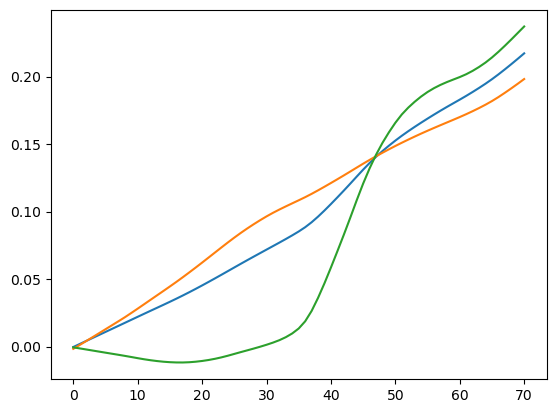

In [19]:
for i in centers:
    plt.plot(i)
plt.show()

In [23]:
# Compute silhouette scores
import numpy as np

# Define alpha and d_hat functions (extracted from your clustering code)
def alpha(x, y):
    return np.dot(x, y) / np.dot(y, y)

def d_hat(x, y):
    return np.linalg.norm(x - alpha(x, y) * y) / np.linalg.norm(x)

def compute_silhouette_scores(x, labels):
    """
    Compute silhouette scores using the custom distance metric d_hat.
    
    Parameters:
        x: Original time series data, shape (n_samples, n_features)
        labels: Cluster labels for each sample, shape (n_samples,)
    
    Returns:
        mean_score: Mean silhouette score across all samples
        s: Silhouette score for each sample
    """
    n_samples = x.shape[0]
    D = np.zeros((n_samples, n_samples))  # Pairwise distance matrix
    
    # Compute distances between all pairs of samples
    for i in range(n_samples):
        for j in range(n_samples):
            D[i, j] = d_hat(x[i], x[j])
    
    a = np.zeros(n_samples)  # Mean intra-cluster distance
    b = np.zeros(n_samples)  # Mean nearest-cluster distance
    
    for i in range(n_samples):
        current_cluster = labels[i]
        
        # Compute a[i]: average distance to other samples in the same cluster
        same_cluster = np.where(labels == current_cluster)[0]
        same_cluster = same_cluster[same_cluster != i] 
        a[i] = np.mean(D[i, same_cluster]) if len(same_cluster) > 0 else 0
        
        # Compute b[i]: average distance to the nearest different cluster
        other_clusters = np.unique(labels[labels != current_cluster])
        b_list = []
        for c in other_clusters:
            cluster_samples = np.where(labels == c)[0]
            if len(cluster_samples) == 0:
                continue
            b_list.append(np.mean(D[i, cluster_samples]))
        
        b[i] = np.min(b_list) if len(b_list) > 0 else 0
    
    
    s = (b - a) / np.maximum(a, b)
    
    return np.mean(s), s


In [ ]:
avg_silhouette, silhouette_scores = compute_silhouette_scores(x, labels)